# Optymalizacja tras dla floty pojazdów dostawczych

#### Szymon Wysogląd, Filip Poray Zbrożek

## Model opisowy rzeczywistego problemu


### Krótkie wprowadzenie

Aby spełnić oczekiwania rynku konieczne jest precyzyjne planowanie i optymalizacja tras dla floty
pojazdów dostawczych, jej planowanie to kluczowy element który wpływa na koszty operacyjne
przedsiębiorstwa logistycznego. 

Optymalizacja tego problemu pozwala na:
- zminimalizowanie kosztów paliwa
- zmniejszenie czasu dostawy
- lepsze wykorzystanie dostępnych zasobów, takich jak pojazdy i personel


### Co podlega optymalizacji – jedno / wielokryterialna?
Optymalizacji podlegają koszty, które są liczone jako czas zatrudnienia oraz zużycie paliwa.

### Istotne uwarunkowania i zależności
- czas pracy kierowców
- pojemność pojazdów
- okna czasowe dostaw


### Zastosowane uproszczenia zachowujące istotę problemu
- jazda z maksymalną dopuszczalną prędkością
- pominięcie korków
- pominięcie eksploatacji pojazdów
- jeden rodzaj pojazdu

Te uproszczenia pozwalają skupić się na kluczowych elementach problemu, takich jak struktura sieci drogowej, lokalizacje klientów oraz optymalizacja trasy pod kątem głównych kryteriów.

### Jaka informacja (dane) konieczne są do rozwiązania problemu
Konieczne są: 
- informacje o drogach, w tym ich ograniczeniach prędkości, długościach oraz stanie technicznym (możlwością przejazdu).
- rozmieszczenie klientów

## Model matematyczny problemu

Nasz problem wykazuje wiele podobieństw do Problemu Wielu Komiwojażerów (mTSP). 

mTSP jest uogólnieniem klasycznego Problemu Komiwojażera, gdzie dopuszcza się więcej niż jednego
komiwojażera. 

Podobnie jak w naszym przypadku, gdzie mamy wielu kierowców obsługujących
różne przesyłki, w mTSP dąży się do wyznaczenia tras dla wielu sprzedawców w taki sposób, aby
minimalizować całkowity koszt (czas, odległość, koszty operacyjne). 

Każdy kierowca musi odwiedzić każde miasto (punkt dostawy) dokładnie raz, co koresponduje z
naszym celem optymalizacji tras dostaw paczek przy ograniczonych zasobach, takich jak czas
pracy kierowców oraz pojemność pojazdów.


### Plan


1. Przetworzenie rzeczywistych danych za pomocą algorytmu Floyda, aby uzyskać graf ważony z bezpośrednimi czasami przejazdu między punktami (zakładamy, że takie dane otrzymamy).

2. Ponieważ chcemy maksymalizować priorytet oraz minimalizować koszty (czas dostaw), to otrzymamy dwie funkcje celu, które następnie złączymy.

3. Określenie ograniczeń na funkcję celu.

4. Optymalizacja funkcji celu.

5. Wynikiem będzie optymalny podział grafu na kierowców.

### Parametry


- $ V $ — zbiór punktów dostaw (bez magazynu).
- $ s $ — punkt startowy (magazyn).
- $ K $ — liczba kierowców.
- $ D_k \subseteq V $ — zbiór punktów dostaw przypisanych kierowcy $ k $.
- $ E $ — zbiór krawędzi grafu ważonego, gdzie waga to czas potrzebny na podróż między punktami.
- $ t_{ij} $ — czas przejazdu między punktami $ i $ i $ j $.
- $ E_k \subseteq E $ — zbiór krawędzi tworzących trasę dla kierowcy $ k $.
- $ T_k $ — maksymalny dostępny czas dla kierowcy $ k $.
- $ v_i $ — objętość paczki w punkcie $ i $.
- $ V_k $ — pojemność pojazdu kierowcy $ k $.
- $ Z_k $ — koszt wypożyczenia pojazdu dla kierowcy $ k $.
- $ c_i $ — cena zapłacona przez klienta za dostawę paczki w punkcie $ i $.
- $ p_i $ — ile dni paczka $i$ zalega w magazynie.
- $ \alpha $ — koszt jednostkowy czasu operacji pojazdu (np. paliwo, wynagrodzenie kierowcy).
- $ \beta $ — kara za każdy dzień opóźnienia w dostawie.

### Zmienne decyzyjne
Zmienne decyzyjne będą decyzją, do którego podgrafu powinien zostać włączony wierzchołek.

### Funkcja celu

Maksymalizujemy całkowity zysk:

$$
\begin{align*}
\text{Zysk} &= \text{Całkowity przychód} - \text{Całkowity koszt} \\
&= \left( \sum_{k=1}^{K} \sum_{i \in D_k} c_i \right) - \left( \sum_{k=1}^{K} \left( \alpha \sum_{e \in E_k} t_e + Z_k \right) + \sum_{i \in V} \beta \cdot p_i \right)
\end{align*}
$$

Uproszczona funkcja celu:

$$
f = \sum_{k=1}^{K} \left( \sum_{i \in D_k} c_i - \alpha \sum_{e \in E_k} t_e - Z_k \right) - \sum_{i \in V} \beta \cdot p_i
$$

Naszym celem jest maksymalizacja zysku, czyli funkcji celu $f$ czyli minimalizacja funkcji $-f$.

### Ograniczenia

1. Sumaryczny czas pracy kierowcy nie może przekraczać maksymalnego czasu pracy kierowcy:
$$\sum_{e \in E_k} t_{e} \le T_k, \forall k \in K$$

2. Początek i koniec trasy jest w lokalizacji magazynu $s$.
$$ s \in V_k, \forall k \in K$$

### Postać rozwiazania

Rozwiązanie będzie miało postać podziału paczek między kierowców. Paczki które nie
zostaną rozwiezione w ciągu dnia będą musiały zostać dostarczone dnia kolejnego (będą
miały wtedy wyższy priorytet niż paczki dla których jest to pierwsza próba doręczenia).


## Alogrytm samoistnego wyżarzania

Algorytm samoistnego wyżarzania będzie minimalizował naszą funkcję celu.

1. Wybierz losowy podział paczek między kierowców - ($k+1$ zbiorów - bo jeden nie dostarczamy).
2. Iterujemy od Tmax do Tmin (określimy funkcję spadku temperatury).
3. W każdej iteracji:
    - operacja to przeniesienie przesyłki do innego zbioru
    - liczymy "zmiane Energii" (czyli zmianę funkcji celu)
    - jeżeli rozwiazanie jest lepsze to nadpisujemy
    - jeżeli jest gorsze, to liczymy prawdopodobienstwo, ze je zostawimy i losujemy, które zostawiamy a, które nie

# Model danych, postać rozwiązania i funkcja celu

W wersji naszego algorytmu korzystamy z miejsc dostaw, które mają postać punktów o współrzędnych ```x``` oraz ```y```. Te wartości byłyby ściągane z pliku csv. Do ich przechowywania byłaby klasa ```Node```, która ma dwa atrybuty ```x``` oraz ```y``` oraz kilka funkcji definiujących dodawanie, odejmowanie oraz odległości między punktami. Przyjęliśmy taką formę dla prostszej wizualizacji otrzymanego rozwiązania, ponieważ w przypadku macierzy sąsiedztwa nie byłoby to tak widoczne na wykresie.

Każdy kierowca ma swoją trasę, która jest listą punktów dostaw. Stworzyliśmy klasę ```DeliveryRoute```, która właśnie przechowuje taką listę, ale ma również zaimplementowane metody dodawania oraz usuwanie punktów, tak aby punkty dostaw w obrębie jednego kierowcy układały się w optymalny sposób rozwiązując pojedynczy problem komiwojażera. Pojedyncza operacja dodania wierzchołka ma złożoność ```O(n)```, gdzie ```n``` to liczba wierzchołków aktualnie w trasie kuriera, natomiast usuwanie wierzchołka jest w czasie stałym ```O(1)```. Dodatkowo każda struktura przechowuje informację o współrzędnych magazynu.

Każda solucja jest określona jako klasa ```RoutePlaner```, która przechowuje listę tras dla każdego kierowcy, a także informacje o kosztach, zyskach oraz innych parametrach.

Aktualnie funkcje celu są zdefiniowane jako sumaryczna długość trasy, jednak będą dodatkowe "kary" za zbyt długie trasy, ograniczenia czasowe oraz koszt pojemności samochodu. 

Algorytm ArtificialBeeColony będzie na początku losował rozwiązania, a następnie będzie je poprawiał, aż do osiągnięcia zadowalającego wyniku.

## Algorytm ABC - Artificial Bee Colony

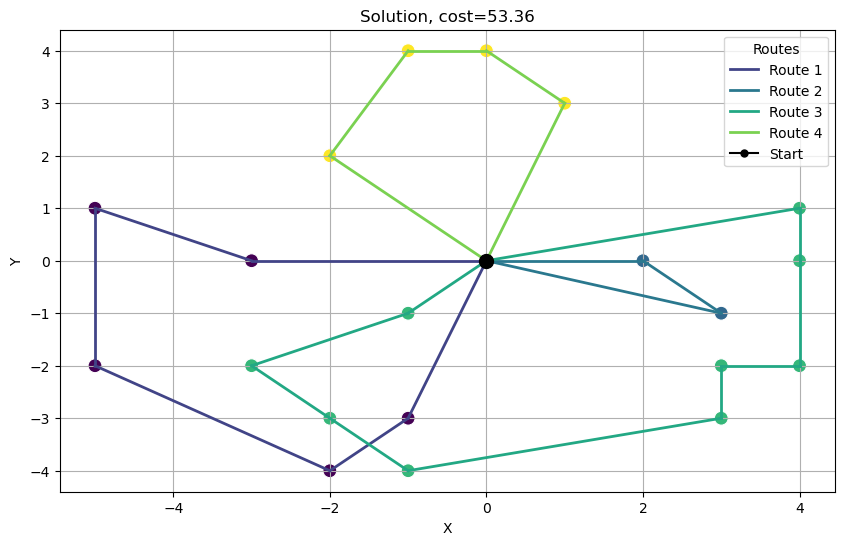

In [6]:
# from src.RoutePlaner import RoutePlaner
from src.Node import Node
# from src.DeliveryRoute import DeliveryRoute
import numpy as np
from src.ABC_algorithm import artifical_bee_colony_algorithm
np.random.seed(32)
node_count = 20
courier_count = 4
a, b = -5, 5

start = Node(0,0)
nodes = [Node(np.random.randint(a,b), np.random.randint(a,b)) for _ in range(node_count)]
#remove duplicates
nodes = list(dict.fromkeys(nodes))
sol = artifical_bee_colony_algorithm(courier_count, nodes, start, bp=100, mcn=1000, p=10, employed_bees_ratio=0.5)
sol.plot_solution()